## Imports

In [1]:
# To embed plots in the notebooks
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np # numpy library
import scipy . linalg as lng # linear algebra from scipy library
from scipy . spatial import distance # load distance function
from sklearn import preprocessing as preproc # load preprocessing function

# seaborn can be used to "prettify" default matplotlib plots by importing and setting as default
import seaborn as sns
sns.set() # Set searborn as default

## Load dataset

In [2]:
diabetPath = "./DiabetesDataNormalized.txt"
T = np.loadtxt(diabetPath, delimiter=" ", skiprows=1)
y = T[:, 10]
X = T[:, :10]

# Get number of observations (n) and number of independent variables (p)
[n, p] = np.shape(X)

## 4 Implement and solve KNN regression:
> (a) Implement a KNN regression algorithm:

>> (i) Find the K nearest neighbours using a suitable distance metric (e.g. Euclidean). Compute the predicted response as the mean of the K neighbours.



In [3]:
# Implement the algorithm for knn
def knn(K, X, n):
    yhat = np.zeros(n)
    for i in range(n):
        # calculate the distance between the i-th observation and all other observations
        dist = np.zeros(n)
        for j in range(n):
            dist[j] = distance.euclidean(X[i,], X[j,])
        # sort the distances and get the indices of the K nearest neighbours
        idx = np.argsort(dist)
        idx = idx[1 : (K + 1)]
        # calculate the mean of the K nearest neighbours
        yhat[i] = np.mean(y[idx])

    return yhat


# it would make sense to test it by evaluating the MSE
K = 5  # number of neighbours
yhat = knn(K, X, n)
mse = np.mean((y - yhat) ** 2)
# test implementation
print(f"MSE value for K = {K} is: {mse}")
# mse ~ 0.618 for K = 5

MSE value for K = 5 is: 0.6182202180421111


>> (ii) Optional: Compute weights for the neighbours as the proportion of its distance to the total distance for the K nearest neighbours and Compute the predicted response as the (weighted) mean of the K neighbours.

In [ ]:
# Implement the algorithm for weighted knn
def weighted_knn(K, X, n):
    
    
    return yhat

# it would make sense to test it  by evaluating the MSE
K = 5 # number of neighbours
yhat = weighted_knn(K, X, n)
mse = 
# test implementation
print(f'MSE value for K = {K} is: {mse}')
# mse ~ 0.613 for K = 5

> (b) Find a solution to the diabetes data using KNN regression. Try different options for K.

MSE value for K = 1 is: 0.9906281304299507
MSE value for K = 2 is: 0.7398431386613016
MSE value for K = 3 is: 0.6850853168637211
MSE value for K = 4 is: 0.6158572394178363
MSE value for K = 5 is: 0.6182202180421111
MSE value for K = 6 is: 0.5992118132856249
MSE value for K = 7 is: 0.5863501627559116
MSE value for K = 8 is: 0.5767130272153445
MSE value for K = 9 is: 0.5700935840861078
MSE value for K = 10 is: 0.5654832300943246
MSE value for K = 11 is: 0.5680279732715863
MSE value for K = 12 is: 0.5602706504533235
MSE value for K = 13 is: 0.5599403804049441
MSE value for K = 14 is: 0.552628647875982
MSE value for K = 15 is: 0.5545890702335298
MSE value for K = 16 is: 0.5497053102979395
MSE value for K = 17 is: 0.5486242391693184
MSE value for K = 18 is: 0.5399400684876451
MSE value for K = 19 is: 0.5408240996325178
MSE value for K = 20 is: 0.543472807951842


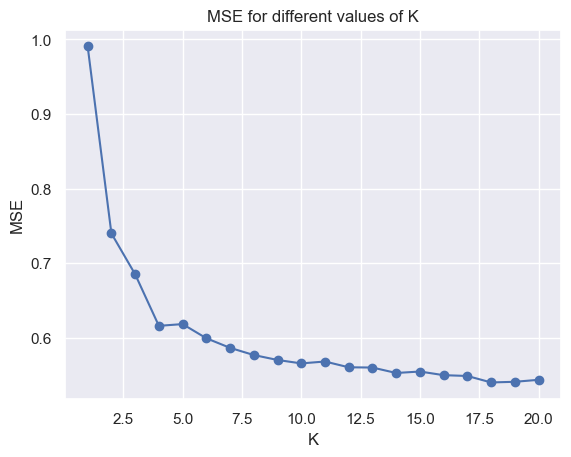

In [4]:
# Use the KNN algorithm previously created with different values for K

# Define a range of K values to test
K_values = range(1, 21)
mse_values = []

# Evaluate the MSE for each K
for K in K_values:
    yhat = knn(K, X, n)
    mse = np.mean((y - yhat) ** 2)
    mse_values.append(mse)
    print(f"MSE value for K = {K} is: {mse}")

# Plot the MSE values for different K
plt.plot(K_values, mse_values, marker="o")
plt.xlabel("K")
plt.ylabel("MSE")
plt.title("MSE for different values of K")
plt.show()

What happens when we increase K?

Discuss the role of the chosen weights?

When we increase K, the model becomes less sensitive to noise in the data, as it considers more neighbors to make predictions. However, if K is too large, the model may become too smooth and lose important details, leading to underfitting.